<a href="https://colab.research.google.com/github/gseetha04/stakeholder-classification/blob/main/stakeholder_taxonomy_Level1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# A dependency of the preprocessing for BERT inputs
!pip install -q -U "tensorflow-text==2.11.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 32.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.9.3 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protob

In [ ]:

!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 31.9 MB/s

In [ ]:
import os
import shutil

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [ ]:
df = pd.read_csv('training_data.csv')

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,Causal-relation ID,Causal-relation text,Variables,Role in the text,expertA_level0,expertA_level1,expertB_level2,expertB_level0,...,expertB_level2.1,Label,Label1,Label2,Label_f,performance,Label1_f,Level1,Label2_f,Level2
0,0,0,AFLAC_Wyatt_1,"When a policyholder or insured gets sick or hurt, the Company pays cash benefits fairly and promptly for eligible claims",cash benefits fairly and promptly for eligible claims,outcome,P,CUS,CUS4,P,...,CUS4,P,CUS,CUS4,P,1,CUS,0,CUS4,3
1,1,1,AFLAC_Wyatt_1,"When a policyholder or insured gets sick or hurt, the Company pays cash benefits fairly and promptly for eligible claims",policyholder or insured gets sick or hurt,cause,NP,NP,NP,NP,...,NP,P,CUS,NP,P,1,CUS,0,NP,11
2,2,2,AFLAC_Wyatt_2,"During 2020, in response to the onset and development of the global COVID-19 pandemic, , the Company pivoted to digital sales methods and accelerated related digital investments .",to digital sales methods,outcome,NP,NP,NP,NP,...,NP,P,INV,NP,P,1,INV,2,NP,11
3,3,3,AFLAC_Wyatt_2,"During 2020, in response to the onset and development of the global COVID-19 pandemic, , the Company pivoted to digital sales methods and accelerated related digital investments .",related digital investments,outcome,NP,NP,NP,NP,...,NP,P,INV,NP,P,1,INV,2,NP,11
4,4,4,AFLAC_Wyatt_2,"During 2020, in response to the onset and development of the global COVID-19 pandemic, , the Company pivoted to digital sales methods and accelerated related digital investments .","the onset and development of the global COVID-19 pandemic,",cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14503,14503,14503,ZION_Golnaz_Alice_151,"We reduced share-based compensation expense by $1 million during 2019, 2018, and 2017, respectively, as a result of using a valuation model to estimate a liquidity discount on RSUs with post-vesting restrictions.",using a valuation model to estimate a liquidity discount on RSUs with post-vesting restrictions.,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
14504,14504,14504,ZION_Golnaz_Alice_151,"During 2018 after filing its 2017 federal and state tax returns, the Bank finalized its analysis of all net DTAs that existed at December 31, 2017 and made a $(2) million tax benefit adjustment on net DTAs as a result of the Act.","Bank finalized its analysis of all net DTAs that existed at December 31, 2017 and made a $(2) million tax benefit adjustment on net DTAs",outcome,P,UC,UC,P,...,UC,P,UC,UC,P,1,UC,5,UC,15
14505,14505,14505,ZION_Golnaz_Alice_151,"During 2018 after filing its 2017 federal and state tax returns, the Bank finalized its analysis of all net DTAs that existed at December 31, 2017 and made a $(2) million tax benefit adjustment on net DTAs as a result of the Act.",the Act.,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
14506,14506,14506,ZION_Golnaz_Alice_151,"The following schedule does not present total assets or income tax expense for each operating segment, but instead presents average loans, average deposits and income before income taxes because these are the metrics that management uses when evaluating performance and making decisions pertaining to the operating segments.","presents average loans, average deposits and income before income taxes",outcome,P,INV,INV1,P,...,INV1,P,INV,INV1,P,1,INV,2,INV1,7


In [ ]:
import keras
y = keras.utils.to_categorical(df['Level1'], num_classes=6)

In [ ]:
y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df['Variables'],y , test_size=0.2, random_state=1)

In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'bert_en_uncased_L-12_H-768_A-12'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')


BERT model selected           : https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(6, activation='sigmoid', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()

In [ ]:
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_word_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_type_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                                

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy() #SparseCategoricalCrossentropy from_logits=True

accuracy = tf.metrics.CategoricalAccuracy()
recall = tf.metrics.Recall()
precision = tf.metrics.Precision()
metrics = [accuracy, recall, precision]

In [ ]:
epochs =5

In [ ]:
classifier_model.compile(loss=loss,metrics=metrics)

In [ ]:
history = classifier_model.fit(X_train,y_train,epochs=epochs)

Epoch 1/5
363/363 [==============================] - 368s 898ms/step - loss: 1.0537 - categorical_accuracy: 0.6880 - recall: 0.9116 - precision: 0.3565
Epoch 2/5
363/363 [==============================] - 328s 903ms/step - loss: 0.9073 - categorical_accuracy: 0.7201 - recall: 0.9074 - precision: 0.4357
Epoch 3/5
363/363 [==============================] - 326s 898ms/step - loss: 0.9014 - categorical_accuracy: 0.7205 - recall: 0.9043 - precision: 0.4515
Epoch 4/5
363/363 [==============================] - 332s 913ms/step - loss: 0.8962 - categorical_accuracy: 0.7205 - recall: 0.9025 - precision: 0.4533
Epoch 5/5
363/363 [==============================] - 325s 896ms/step - loss: 0.8952 - categorical_accuracy: 0.7205 - recall: 0.8966 - precision: 0.4578


In [ ]:
loss, accuracy, recall, precision = classifier_model.evaluate(X_test,y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {2 * recall * precision / (recall + precision)}')

91/91 [==============================] - 34s 352ms/step - loss: 0.8761 - categorical_accuracy: 0.7316 - recall: 0.9076 - precision: 0.4538
Loss: 0.8761066198348999
Accuracy: 0.731564462184906
Recall: 0.9076498746871948
Precision: 0.4538249373435974
F1: 0.6050999164581299


In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'categorical_accuracy', 'recall', 'precision'])


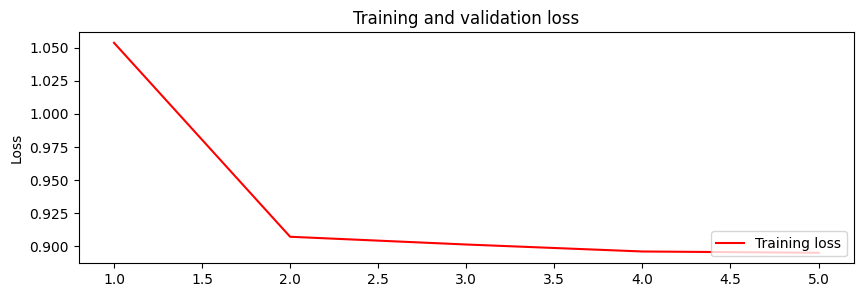

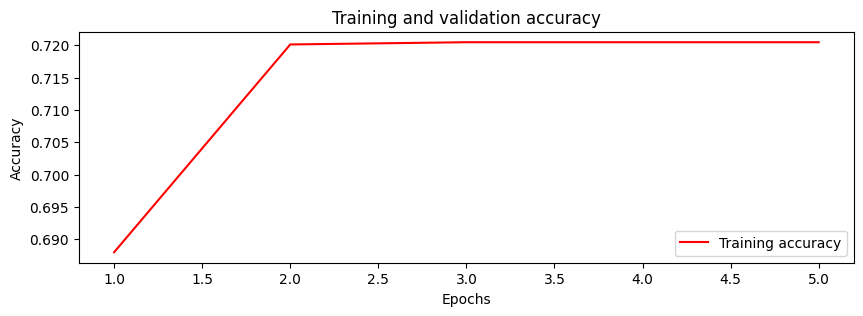

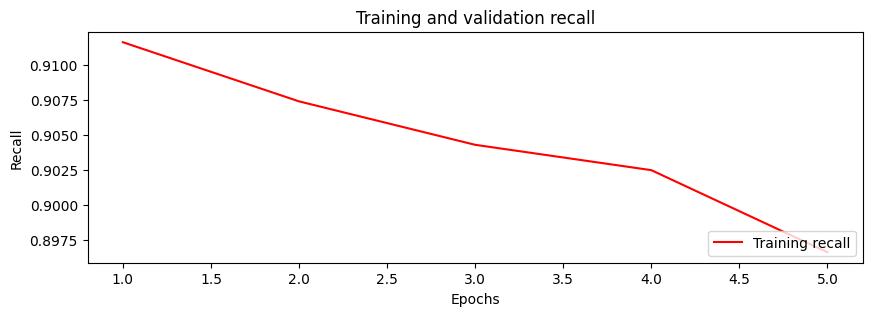

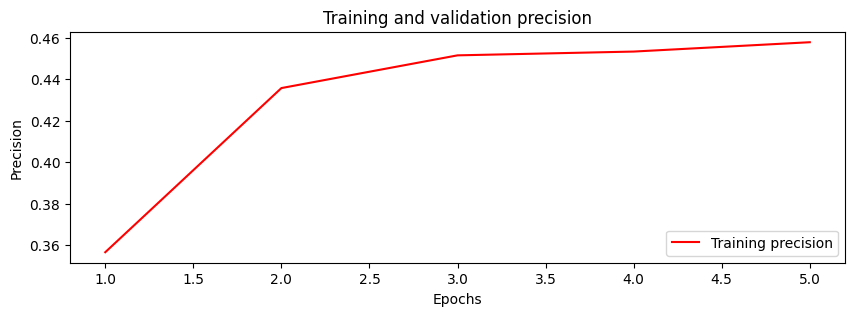

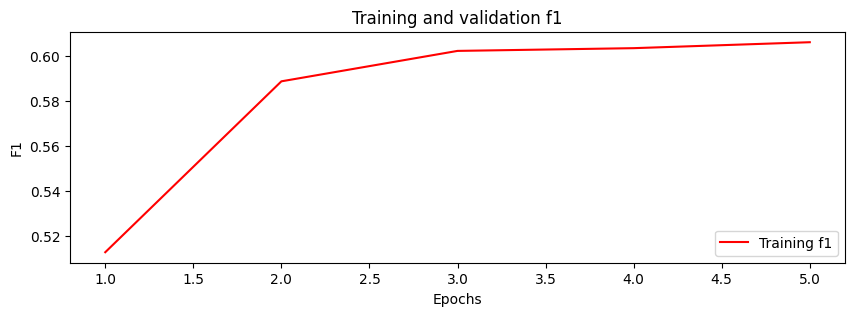

In [ ]:
loss = history_dict['loss']
#val_loss = history_dict['val_loss']

accuracy = history_dict['categorical_accuracy']
##val_accuracy = history_dict['val_categorical_accuracy']

recall = history_dict['recall']
#val_recall = history_dict['val_recall']

precision = history_dict['precision']
#val_precision = history_dict['val_precision']

f1 = [2 * i * j / (i + j) for i,j in zip(recall, precision)]
#val_f1 = [2 * i * j / (i + j) for i,j in zip(val_recall, val_precision)]

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation metric')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, recall, 'r', label='Training recall')
#plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, precision, 'r', label='Training precision')
#plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, f1, 'r', label='Training f1')
#plt.plot(epochs, val_f1, 'b', label='Validation f1')
plt.title('Training and validation f1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend(loc='lower right')
plt.show()
plt.close()

In [ ]:
###########distilBERT############################

In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'distilbert_en_uncased_L-6_H-768_A-12'  #@param ["distilbert_en_uncased_L-6_H-768_A-12", "bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'distilbert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/jeongukjae/distilbert_en_uncased_L-6_H-768_A-12/1',
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'distilbert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/jeongukjae/distilbert_en_uncased_preprocess/2',
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')


BERT model selected           : https://tfhub.dev/jeongukjae/distilbert_en_uncased_L-6_H-768_A-12/1
Preprocess model auto-selected: https://tfhub.dev/jeongukjae/distilbert_en_uncased_preprocess/2


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(6, activation='sigmoid', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy() #SparseCategoricalCrossentropy from_logits=True

accuracy = tf.metrics.CategoricalAccuracy()
recall = tf.metrics.Recall()
precision = tf.metrics.Precision()
metrics = [accuracy, recall, precision]

In [ ]:
epochs = 5

In [ ]:
classifier_model.compile(loss=loss,metrics=metrics)

In [ ]:
history = classifier_model.fit(X_train,y_train,epochs=epochs)

Epoch 1/5
363/363 [==============================] - 192s 458ms/step - loss: 0.9792 - categorical_accuracy: 0.7057 - recall_1: 0.8984 - precision_1: 0.4405
Epoch 2/5
363/363 [==============================] - 167s 459ms/step - loss: 0.8961 - categorical_accuracy: 0.7117 - recall_1: 0.8980 - precision_1: 0.4474
Epoch 3/5
363/363 [==============================] - 166s 458ms/step - loss: 0.9071 - categorical_accuracy: 0.7203 - recall_1: 0.8349 - precision_1: 0.5193
Epoch 4/5
363/363 [==============================] - 167s 460ms/step - loss: 0.9037 - categorical_accuracy: 0.7205 - recall_1: 0.7335 - precision_1: 0.6721
Epoch 5/5
363/363 [==============================] - 169s 466ms/step - loss: 0.8976 - categorical_accuracy: 0.7205 - recall_1: 0.6882 - precision_1: 0.7174


In [ ]:
loss, accuracy, recall, precision = classifier_model.evaluate(X_test,y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {2 * recall * precision / (recall + precision)}')

91/91 [==============================] - 20s 203ms/step - loss: 0.8809 - categorical_accuracy: 0.7316 - recall_1: 0.7316 - precision_1: 0.7316
Loss: 0.8808640241622925
Accuracy: 0.731564462184906
Recall: 0.731564462184906
Precision: 0.731564462184906
F1: 0.731564462184906


In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'categorical_accuracy', 'recall_1', 'precision_1'])


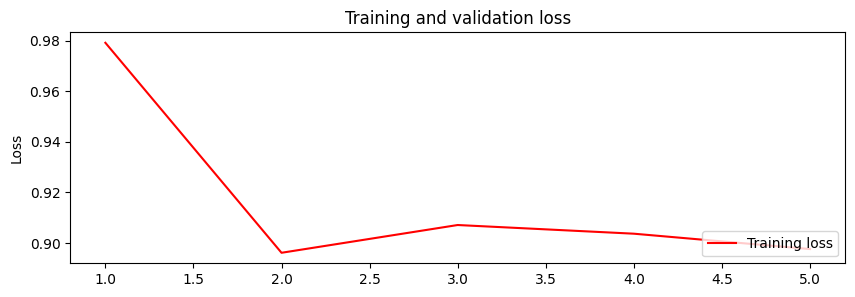

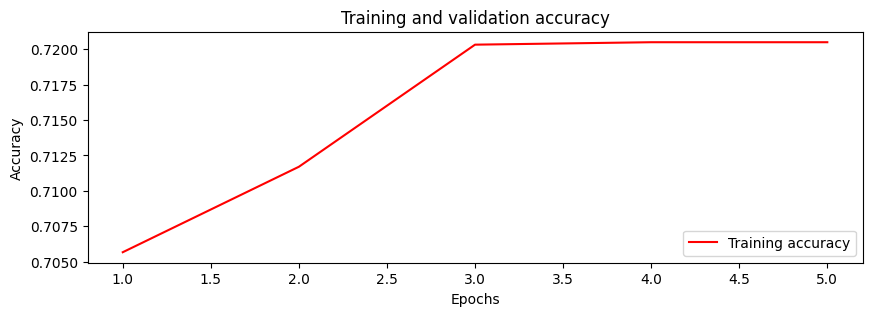

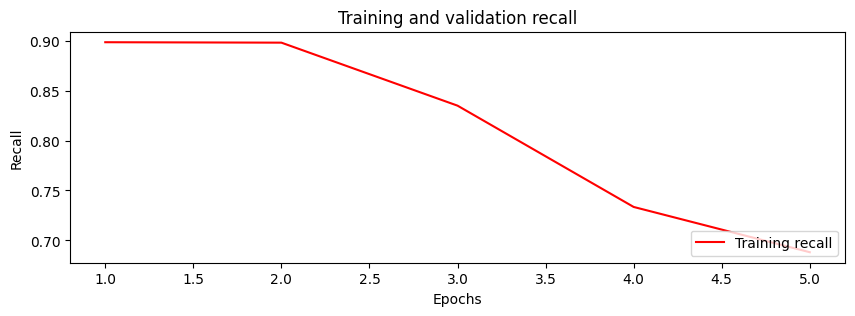

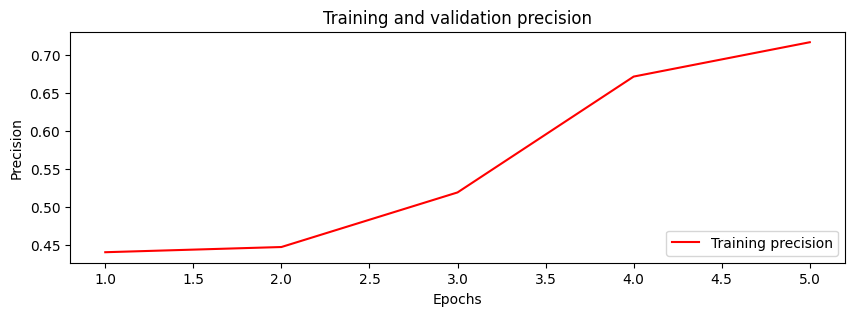

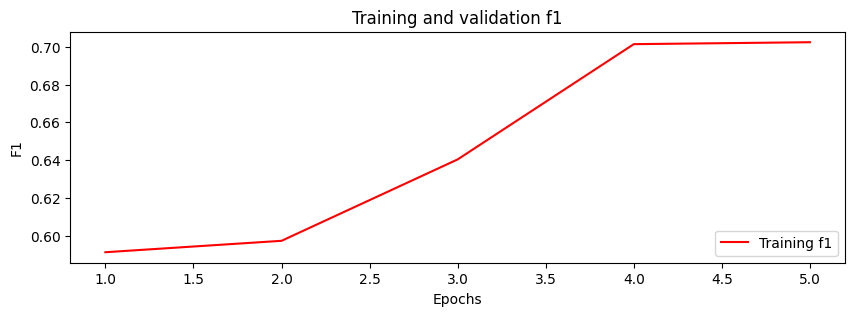

In [ ]:
loss = history_dict['loss']
#val_loss = history_dict['val_loss']

accuracy = history_dict['categorical_accuracy']
##val_accuracy = history_dict['val_categorical_accuracy']

recall = history_dict['recall_1']
#val_recall = history_dict['val_recall']

precision = history_dict['precision_1']
#val_precision = history_dict['val_precision']

f1 = [2 * i * j / (i + j) for i,j in zip(recall, precision)]
#val_f1 = [2 * i * j / (i + j) for i,j in zip(val_recall, val_precision)]

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation metric')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, recall, 'r', label='Training recall')
#plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, precision, 'r', label='Training precision')
#plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, f1, 'r', label='Training f1')
#plt.plot(epochs, val_f1, 'b', label='Validation f1')
plt.title('Training and validation f1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend(loc='lower right')
plt.show()
plt.close()

In [ ]:
########################classify_text_with_bert (experts_wiki_books)

In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'experts_wiki_books'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')


BERT model selected           : https://tfhub.dev/google/experts/bert/wiki_books/2
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(6, activation='sigmoid', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()

In [ ]:
classifier_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_mask': (None, 128)   0         ['text[0][0]']                
                             , 'input_word_ids': (None,                                           
                              128),                                                               
                              'input_type_ids': (None,                                            
                             128)}                                                                
                                                                                            

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy() #SparseCategoricalCrossentropy from_logits=True

accuracy = tf.metrics.CategoricalAccuracy()
recall = tf.metrics.Recall()
precision = tf.metrics.Precision()
metrics = [accuracy, recall, precision]

In [ ]:
epochs = 5

In [ ]:
classifier_model.compile(loss=loss,metrics=metrics)

In [ ]:
history = classifier_model.fit(X_train,y_train,epochs=epochs)

Epoch 1/5
363/363 [==============================] - 357s 868ms/step - loss: 1.1678 - categorical_accuracy: 0.6755 - recall_2: 0.9777 - precision_2: 0.2155
Epoch 2/5
363/363 [==============================] - 316s 871ms/step - loss: 0.9922 - categorical_accuracy: 0.6922 - recall_2: 0.9981 - precision_2: 0.1931
Epoch 3/5
363/363 [==============================] - 315s 868ms/step - loss: 0.9846 - categorical_accuracy: 0.6901 - recall_2: 0.9986 - precision_2: 0.1807
Epoch 4/5
363/363 [==============================] - 315s 869ms/step - loss: 0.9822 - categorical_accuracy: 0.6944 - recall_2: 0.9998 - precision_2: 0.1689
Epoch 5/5
363/363 [==============================] - 315s 867ms/step - loss: 0.9827 - categorical_accuracy: 0.6978 - recall_2: 0.9997 - precision_2: 0.1678


In [ ]:
loss, accuracy, recall, precision = classifier_model.evaluate(X_test,y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {2 * recall * precision / (recall + precision)}')

91/91 [==============================] - 32s 333ms/step - loss: 0.9731 - categorical_accuracy: 0.7316 - recall_2: 1.0000 - precision_2: 0.1667
Loss: 0.9731478691101074
Accuracy: 0.731564462184906
Recall: 1.0
Precision: 0.1666666716337204
F1: 0.2857142930128136


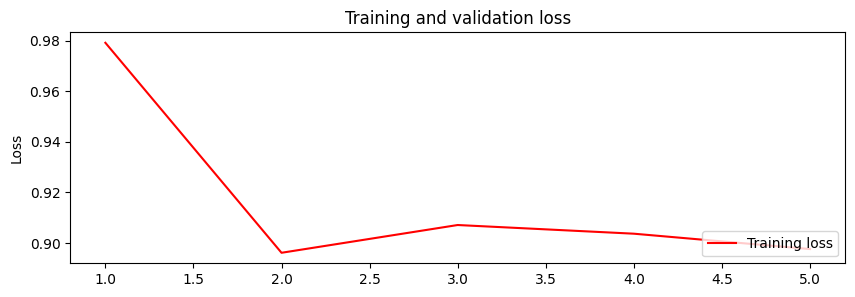

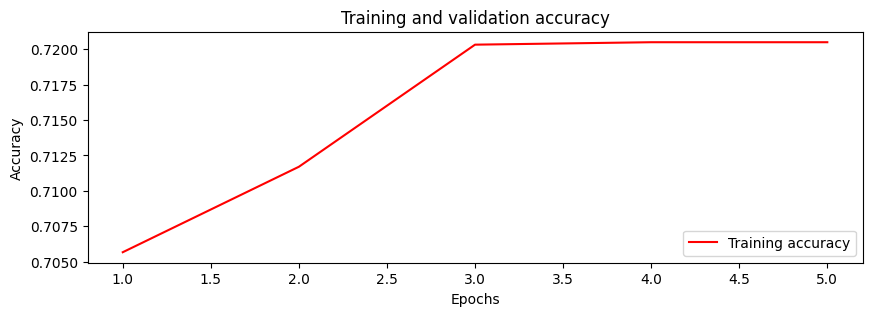

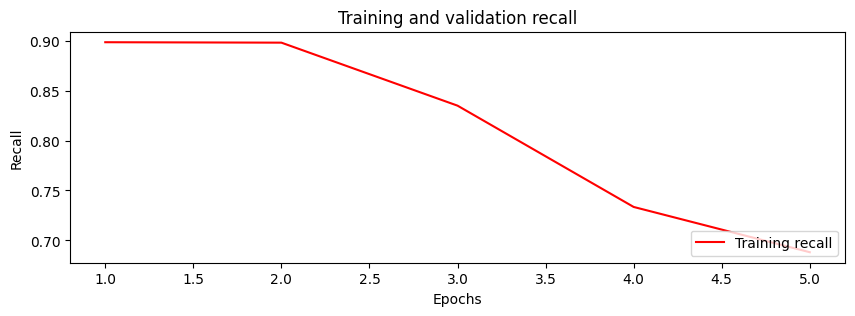

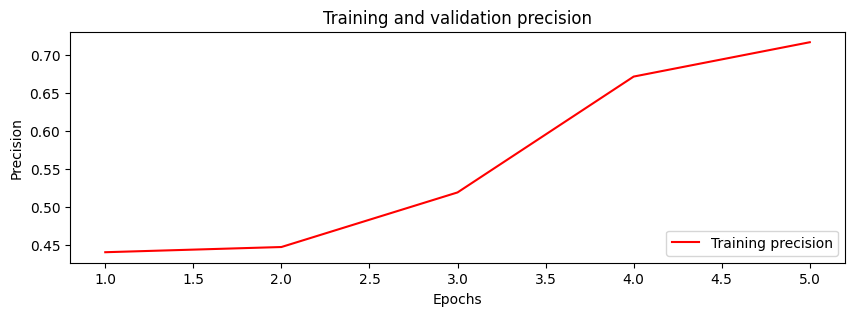

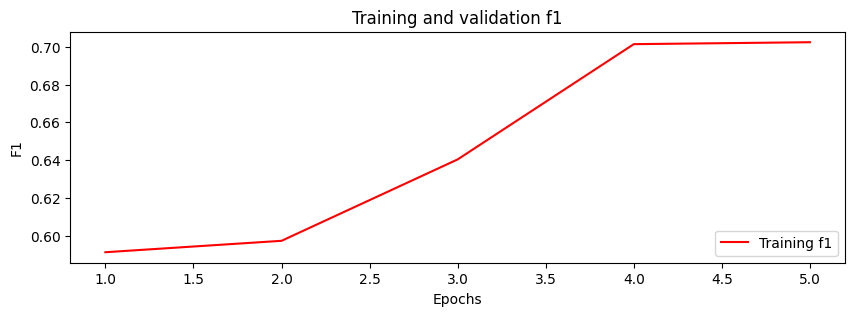

In [ ]:
loss = history_dict['loss']
#val_loss = history_dict['val_loss']

accuracy = history_dict['categorical_accuracy']
##val_accuracy = history_dict['val_categorical_accuracy']

recall = history_dict['recall_1']
#val_recall = history_dict['val_recall']

precision = history_dict['precision_1']
#val_precision = history_dict['val_precision']

f1 = [2 * i * j / (i + j) for i,j in zip(recall, precision)]
#val_f1 = [2 * i * j / (i + j) for i,j in zip(val_recall, val_precision)]

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation metric')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, recall, 'r', label='Training recall')
#plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, precision, 'r', label='Training precision')
#plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, f1, 'r', label='Training f1')
#plt.plot(epochs, val_f1, 'b', label='Validation f1')
plt.title('Training and validation f1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend(loc='lower right')
plt.show()
plt.close()

In [ ]:
##########talking-heads_base

In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'talking-heads_base'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(6, activation='sigmoid', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()

In [ ]:
classifier_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                            

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy() #SparseCategoricalCrossentropy from_logits=True

accuracy = tf.metrics.SparseCategoricalAccuracy()
recall = tf.metrics.Recall()
precision = tf.metrics.Precision()
metrics = [accuracy, recall, precision]

In [ ]:
epochs = 5

In [ ]:
classifier_model.compile(loss=loss,metrics=metrics)

In [ ]:
history = classifier_model.fit(X_train,y_train,epochs=epochs)

Epoch 1/5
363/363 [==============================] - 454s 1s/step - loss: 1.1291 - categorical_accuracy: 0.6764 - recall_3: 0.9755 - precision_3: 0.2160
Epoch 2/5
363/363 [==============================] - 412s 1s/step - loss: 0.9907 - categorical_accuracy: 0.6865 - recall_3: 0.9970 - precision_3: 0.1962
Epoch 3/5
363/363 [==============================] - 412s 1s/step - loss: 0.9909 - categorical_accuracy: 0.6905 - recall_3: 0.9989 - precision_3: 0.1809
Epoch 4/5
363/363 [==============================] - 412s 1s/step - loss: 0.9790 - categorical_accuracy: 0.6908 - recall_3: 0.9992 - precision_3: 0.1737
Epoch 5/5
363/363 [==============================] - 412s 1s/step - loss: 0.9803 - categorical_accuracy: 0.6968 - recall_3: 0.9999 - precision_3: 0.1693


In [ ]:
loss, accuracy, recall, precision = classifier_model.evaluate(X_test,y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {2 * recall * precision / (recall + precision)}')

91/91 [==============================] - 41s 438ms/step - loss: 1.1126 - categorical_accuracy: 0.7316 - recall_3: 1.0000 - precision_3: 0.1667
Loss: 1.1125950813293457
Accuracy: 0.731564462184906
Recall: 1.0
Precision: 0.1666666716337204
F1: 0.2857142930128136


In [ ]:
################Bi-LSTM

In [ ]:
import numpy as np
import pandas as pd

import tensorflow_datasets as tfds
import tensorflow as tf

#tfds.disable_progress_bar()

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [ ]:
df = pd.read_csv('/content/training_data.csv')

In [ ]:
from sklearn.model_selection import train_test_split
# split dataset into training set and test set
train,test = train_test_split(df , test_size=0.2, random_state=1)

In [ ]:
train

,Unnamed: 0.1,Unnamed: 0,Causal-relation ID,Causal-relation text,Variables,Role in the text,expertA_level0,expertA_level1,expertB_level2,expertB_level0,...,expertB_level2.1,Label,Label1,Label2,Label_f,performance,Label1_f,Level1,Label2_f,Level2
9468,9468,9468,PFG_Punit_Alice_46,We may also experience operational disrupti...,experience operational disruptions if our em...,outcome,NP,NP,NP,NP,...,NP,P,EMP,NP,P,1,EMP,1,NP,11
2481,2481,2481,CMA_Jordan_29,Noninterest income was also impacted by a $7 m...,gain recorded in the fourth quarter of 2019 on...,cause,P,INV,INV1,P,...,INV1,P,INV,INV1,P,1,INV,2,INV1,7
8259,8259,8259,MTB_Golnaz_Alice_155,Changes in the balances of such liabilities du...,Changes in the balances of such liabilities,outcome,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
7657,7657,7657,MSCI_Golnaz_Alice_71,budget information and procedures; research pr...,the Companys compilation of that information f...,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
3579,3579,3579,HIG_Jordan_15,The Company may not be able to achieve all the...,Company may not be able to achieve all the rev...,outcome,NP,NP,NP,NP,...,NP,P,INV,NP,P,1,INV,2,NP,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,905,905,AMP_Ryan_26,"However, the Company is not currently subject ...",the Company is not currently subject to the ri...,outcome,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
5192,5192,5192,LNC_Golnaz_Alice_49,"Alternatively, if we were not to raise additio...","unable to do so, our financial strength ratin...",cause,NP,NP,NP,NP,...,NP,P,INV,NP,P,1,INV,2,NP,11
12172,12172,12172,TFC_Golnaz_Alice_213,Failure to comply with applicable laws and reg...,Failure to comply with applicable laws and reg...,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
235,235,235,AFLAC_Wyatt_107,The fair values of the foreign currency forwar...,they are classified as Level 2,outcome,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11


In [ ]:
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion

In [ ]:
# vectorizer = CountVectorizer()
# y_train = vectorizer.fit_transform(train['Variables']).toarray()
# y_test=vectorizer.transform(test['Variables']).toarray()

In [ ]:
# from sklearn.preprocessing import MultiLabelBinarizer
# mlb = MultiLabelBinarizer()
# mlb.fit(df['Label1_f'])

# new_col_names = ["enco" % c for c in mlb.classes_]

# # Create new DataFrame with transformed/one-hot encoded IDs
# ids = pd.DataFrame(mlb.fit_transform(df['Label1_f']), columns=new_col_names,index=df['Label1_f'].index)

# # Concat with original `Label` column
# pd.concat( [df[['Label']], Label1_f], axis=1 )

In [ ]:
import keras
y = keras.utils.to_categorical(df['Level1'], num_classes=6)

In [ ]:
#y_train

In [ ]:
arr =y.tolist()

In [ ]:
df_one = pd.Series(y.tolist())

In [ ]:
df_one_final = pd.DataFrame(df_one)

In [ ]:
# +df_one_final.columns = ['one_hot']

In [ ]:
# df_one_final

In [ ]:
df_final = pd.concat([df,df_one_final],axis=1)

In [ ]:
df_final

,Unnamed: 0.1,Unnamed: 0,Causal-relation ID,Causal-relation text,Variables,Role in the text,expertA_level0,expertA_level1,expertB_level2,expertB_level0,...,Label,Label1,Label2,Label_f,performance,Label1_f,Level1,Label2_f,Level2,0
0,0,0,AFLAC_Wyatt_1,When a policyholder or insured gets sick or ...,cash benefits fairly and promptly for eligible...,outcome,P,CUS,CUS4,P,...,P,CUS,CUS4,P,1,CUS,0,CUS4,3,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,1,1,AFLAC_Wyatt_1,When a policyholder or insured gets sick or ...,policyholder or insured gets sick or hurt,cause,NP,NP,NP,NP,...,P,CUS,NP,P,1,CUS,0,NP,11,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,2,2,AFLAC_Wyatt_2,"During 2020, in response to the onset and dev...",to digital sales methods,outcome,NP,NP,NP,NP,...,P,INV,NP,P,1,INV,2,NP,11,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
3,3,3,AFLAC_Wyatt_2,"During 2020, in response to the onset and dev...",related digital investments,outcome,NP,NP,NP,NP,...,P,INV,NP,P,1,INV,2,NP,11,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
4,4,4,AFLAC_Wyatt_2,"During 2020, in response to the onset and dev...",the onset and development of the global COVID-...,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,0,NP,3,NP,11,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14503,14503,14503,ZION_Golnaz_Alice_151,We reduced share-based compensation expense by...,using a valuation model to estimate a liquidit...,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,0,NP,3,NP,11,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
14504,14504,14504,ZION_Golnaz_Alice_151,During 2018 after filing its 2017 federal and ...,Bank finalized its analysis of all net DTAs th...,outcome,P,UC,UC,P,...,P,UC,UC,P,1,UC,5,UC,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
14505,14505,14505,ZION_Golnaz_Alice_151,During 2018 after filing its 2017 federal and ...,the Act.,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,0,NP,3,NP,11,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
14506,14506,14506,ZION_Golnaz_Alice_151,The following schedule does not present total ...,"presents average loans, average deposits and i...",outcome,P,INV,INV1,P,...,P,INV,INV1,P,1,INV,2,INV1,7,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"


In [ ]:
df_var = df_final['Variables']
# df_one = df_final['one_hot']

In [ ]:
data_final = pd.concat([df_var,df_final['Level1']],axis=1) #df_one

In [ ]:
data_final.to_excel('/content/one-hot.xlsx')

In [ ]:
from sklearn.model_selection import train_test_split
# split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(df_final['Variables'], df_final['Level1'], test_size=0.2)

In [ ]:
Y_train

9265     2
3930     2
10708    2
7120     3
3400     3
        ..
3585     2
2950     3
6168     3
11903    2
8672     3
Name: Level1, Length: 11606, dtype: int64

In [ ]:
# test_d

In [ ]:
type(train)

pandas.core.frame.DataFrame

In [ ]:
# train_fi = pd.DataFrame(train_d)
# test_fi = pd.DataFrame(test_d)

In [ ]:
# train_fi

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(df['Variables'])
word_index = tokenizer.word_index

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_lg

2023-11-10 15:42:26.145983: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-10 15:42:26.146134: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-10 15:42:26.146297: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-10 15:42:30.030426: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
import spacy
text_embedding = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
   text_embedding[i] = nlp(word).vector

In [ ]:
text_embedding.shape[1]

300

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=text_embedding.shape[0],
        output_dim=text_embedding.shape[1],
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6,activation='softmax')
])

In [ ]:
#stacked Bi-lSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=text_embedding.shape[0],
        output_dim=text_embedding.shape[1],
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6,activation='softmax')
])

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy() #from_logits=True

accuracy = tf.metrics.CategoricalAccuracy()
recall = tf.metrics.Recall()
precision = tf.metrics.Precision()
metrics = [accuracy, recall, precision]


In [ ]:
model.compile(loss=loss,
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=metrics)


In [ ]:
MAX_SEQUENCE_LENGTH = 500

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# train_d

In [ ]:
# import tensorflow as tf
# from keras import utils as np_utils
# categorical_labels = tf.keras.utils.to_categorical(
#     train_d, num_classes=6, dtype='float32'
# )

In [ ]:
X_test

3450          increased compensation and benefits expenses
3267            portfolio is highly subject to market risk
7286                                     protect our data.
13591                   do not exercise management control
2674     customer portion of that firm's trading activi...
                               ...                        
7008      maintain the intrinsic value of those awards ...
9645                                     credit-sensitive 
12195    Truist competes with banks and other financial...
9376     a lack of financing to maintain the on-going o...
7594                    fluctuations in asset-based fees, 
Name: Variables, Length: 2902, dtype: object

In [ ]:
Y_train.shape

(11606,)

In [ ]:
#test_d['Level1'].shape()

In [ ]:
Y_test

3450     1
3267     3
7286     3
13591    3
2674     0
        ..
7008     3
9645     3
12195    3
9376     3
7594     3
Name: Level1, Length: 2902, dtype: int64

In [ ]:
num_classes = 6 #number of classes
train_y = keras.utils.to_categorical(Y_train, num_classes)
test_y = keras.utils.to_categorical(Y_test, num_classes)

Loaded model from disk


In [ ]:
#fit the Bi-LSTM - correct code
history = model.fit(pad_sequences(tokenizer.texts_to_sequences(X_train),maxlen=MAX_SEQUENCE_LENGTH),train_y,batch_size=32,epochs=5,
validation_data=(pad_sequences(tokenizer.texts_to_sequences(X_test),maxlen=MAX_SEQUENCE_LENGTH),test_y),shuffle=True)

NameError: ignored

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model.compile(loss=loss,
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=metrics)


In [ ]:
loss, accuracy, recall, precision = loaded_model.evaluate(pad_sequences(tokenizer.texts_to_sequences(X_test),maxlen=MAX_SEQUENCE_LENGTH),test_y)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {2 * recall * precision / (recall + precision)}')

91/91 [==============================] - 69s 689ms/step - loss: 0.3716 - categorical_accuracy: 0.8722 - recall: 0.8432 - precision: 0.9422
Loss: 0.3715846538543701
Accuracy: 0.8721571564674377
Recall: 0.8432115912437439
Precision: 0.9422410726547241
F1: 0.8899800148984323


In [ ]:
predictions = loaded_model.predict(pad_sequences(tokenizer.texts_to_sequences(X_test),maxlen=MAX_SEQUENCE_LENGTH))

91/91 [==============================] - 50s 542ms/step


In [ ]:
print(X_test.shape)

(2902,)


In [ ]:
predictions.shape

(2902, 6)

In [ ]:
predictions

array([[1.8984355e-01, 1.7993660e-01, 3.1895149e-01, 1.1401229e-01,
        7.0451476e-02, 1.2680468e-01],
       [4.4471494e-04, 2.4898152e-04, 1.9531455e-03, 9.9189633e-01,
        1.3149629e-04, 5.3253537e-03],
       [6.2535629e-02, 4.7639430e-02, 1.0014758e-01, 6.2893736e-01,
        3.9499439e-02, 1.2124058e-01],
       ...,
       [1.0344136e-04, 4.8192956e-05, 2.4110891e-04, 9.9815100e-01,
        2.9162760e-05, 1.4270913e-03],
       [1.2264605e-05, 5.1350821e-06, 1.9969941e-05, 9.9969196e-01,
        3.4821333e-06, 2.6722442e-04],
       [6.2226569e-03, 3.8338378e-03, 2.9526789e-02, 9.2245424e-01,
        1.9621386e-03, 3.6000397e-02]], dtype=float32)

In [ ]:
classes = np.argmax(predictions,axis=1)

In [ ]:
print(classes)

[2 3 3 ... 3 3 3]


In [ ]:
# from functools import reduce
# preds_final = []
# for i in predictions:
#   # print(i)
#   # print(reduce(max, i))
#   preds_final.append(max(i))

In [ ]:
# preds_final

In [ ]:
#stacked-BiLSTM
history = model.fit(pad_sequences(tokenizer.texts_to_sequences(X_train),maxlen=MAX_SEQUENCE_LENGTH),train_y,batch_size=32,epochs=5,
validation_data=(pad_sequences(tokenizer.texts_to_sequences(X_test),maxlen=MAX_SEQUENCE_LENGTH),test_y),shuffle=True)

Epoch 1/5
363/363 [==============================] - 1677s 5s/step - loss: 1.2537 - categorical_accuracy: 0.7070 - recall_1: 0.3389 - precision_1: 0.7115 - val_loss: 0.8992 - val_categorical_accuracy: 0.7323 - val_recall_1: 0.6275 - val_precision_1: 0.7463
Epoch 2/5
363/363 [==============================] - 1577s 4s/step - loss: 0.8134 - categorical_accuracy: 0.7657 - recall_1: 0.6255 - precision_1: 0.8188 - val_loss: 0.6767 - val_categorical_accuracy: 0.8115 - val_recall_1: 0.7198 - val_precision_1: 0.8492
Epoch 3/5
363/363 [==============================] - 1572s 4s/step - loss: 0.5902 - categorical_accuracy: 0.8422 - recall_1: 0.7585 - precision_1: 0.8879 - val_loss: 0.5916 - val_categorical_accuracy: 0.8353 - val_recall_1: 0.7677 - val_precision_1: 0.8817
Epoch 4/5
363/363 [==============================] - 1574s 4s/step - loss: 0.4872 - categorical_accuracy: 0.8651 - recall_1: 0.8080 - precision_1: 0.9127 - val_loss: 0.6047 - val_categorical_accuracy: 0.8391 - val_recall_1: 0.791

In [ ]:

# history = model.fit(train_dataset, epochs=10,
#                     validation_data=test_dataset,
#                     validation_steps=30)

In [ ]:
loss, accuracy, recall, precision = model.evaluate(pad_sequences(tokenizer.texts_to_sequences(X_test),maxlen=MAX_SEQUENCE_LENGTH),test_y)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {2 * recall * precision / (recall + precision)}')

91/91 [==============================] - 22s 237ms/step - loss: 0.4977 - categorical_accuracy: 0.8670 - recall: 0.8325 - precision: 0.8909
Loss: 0.4976979196071625
Accuracy: 0.8669883012771606
Recall: 0.8325293064117432
Precision: 0.8908554315567017
F1: 0.8607053761208541


In [ ]:
#stacked Bi-LSTM
loss, accuracy, recall, precision = model.evaluate(pad_sequences(tokenizer.texts_to_sequences(X_test),maxlen=MAX_SEQUENCE_LENGTH),test_y)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {2 * recall * precision / (recall + precision)}')

91/91 [==============================] - 39s 424ms/step - loss: 0.6162 - categorical_accuracy: 0.8377 - recall_1: 0.7994 - precision_1: 0.8825
Loss: 0.6161699295043945
Accuracy: 0.8376981616020203
Recall: 0.7994486689567566
Precision: 0.8824648261070251
F1: 0.8389079851049812


In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'categorical_accuracy', 'recall_1', 'precision_1', 'val_loss', 'val_categorical_accuracy', 'val_recall_1', 'val_precision_1'])


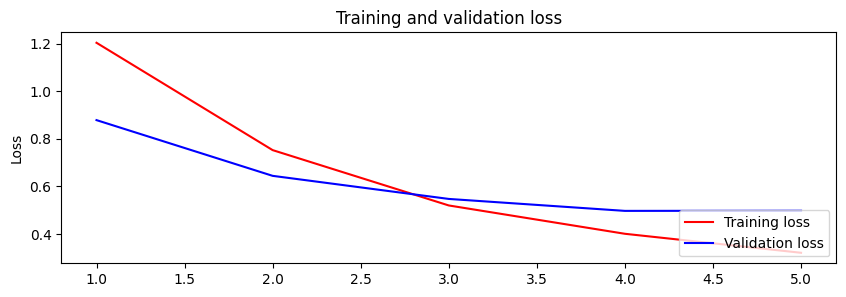

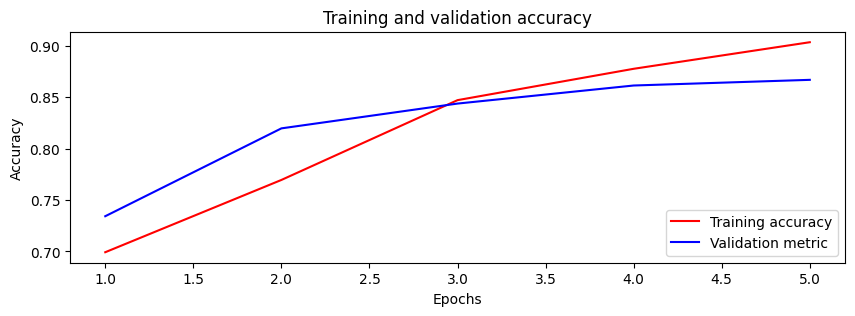

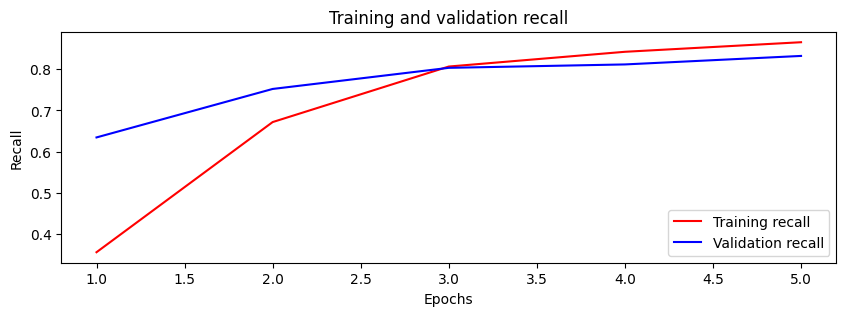

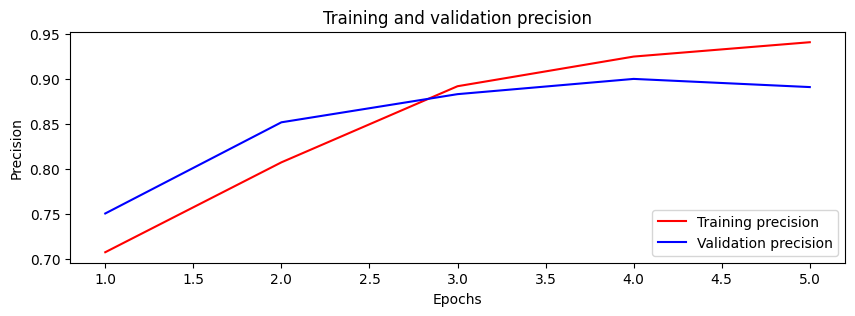

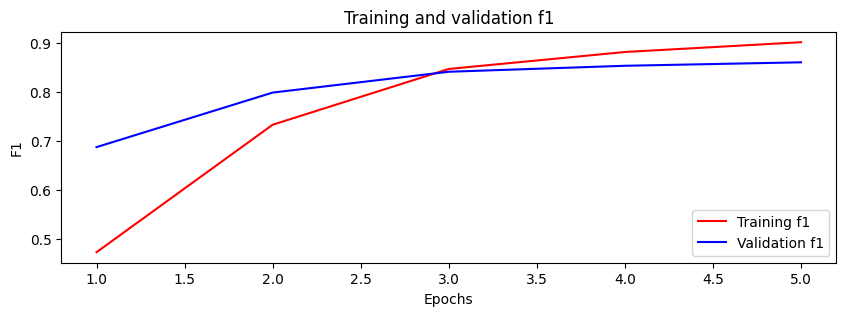

In [ ]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

accuracy = history_dict['categorical_accuracy']
val_accuracy = history_dict['val_categorical_accuracy']

recall = history_dict['recall']
val_recall = history_dict['val_recall']

precision = history_dict['precision']
val_precision = history_dict['val_precision']

f1 = [2 * i * j / (i + j) if (i + j) > 0 else None for i,j in zip(recall, precision) ]
val_f1 = [2 * i * j / (i + j) if (i + j) > 0 else None for i,j in zip(val_recall, val_precision)]

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation metric')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, recall, 'r', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, precision, 'r', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, f1, 'r', label='Training f1')
plt.plot(epochs, val_f1, 'b', label='Validation f1')
plt.title('Training and validation f1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend(loc='lower right')
plt.show()
plt.close()

In [ ]:
#Stacked-BiLSTM
loss = history_dict['loss']
val_loss = history_dict['val_loss']

accuracy = history_dict['categorical_accuracy']
val_accuracy = history_dict['val_categorical_accuracy']

recall = history_dict['recall']
val_recall = history_dict['val_recall']

precision = history_dict['precision']
val_precision = history_dict['val_precision']

f1 = [2 * i * j / (i + j) if (i + j) > 0 else None for i,j in zip(recall, precision) ]
val_f1 = [2 * i * j / (i + j) if (i + j) > 0 else None for i,j in zip(val_recall, val_precision)]

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation metric')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, recall, 'r', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, precision, 'r', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, f1, 'r', label='Training f1')
plt.plot(epochs, val_f1, 'b', label='Validation f1')
plt.title('Training and validation f1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend(loc='lower right')
plt.show()
plt.close()

KeyError: ignored

In [ ]:
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding

In [ ]:
# def create_dataset(dataframe):
#     dataset = tf.data.Dataset.from_tensor_slices(
#         (dataframe["Variables"].to_array(), dataframe["Level1"].to_array()))

#     dataset = dataset.batch(32)
#     dataset = dataset.prefetch(tf.data.AUTOTUNE)
#     return dataset


# train_ds = create_dataset(train_fi)
# test_ds = create_dataset(test_fi)

In [ ]:
# train_ds

In [ ]:
# VOCAB_SIZE = 1000
# encoder = tf.keras.layers.TextVectorization(
#     max_tokens=VOCAB_SIZE)
# train = train_d.Normalization()
# encoder.adapt(train_fi) #.map(lambda text, label: text)

In [ ]:
# vocab = np.array(encoder.get_vocabulary())
# vocab[:20]

array(['', '[UNK]', 'the', 'of', 'and', 'to', 'in', 'or', 'our', 'a',
       'for', 'are', 'on', 'not', 'that', 'may', 'be', 'is', 'from', 'as'],
      dtype='<U15')

In [ ]:
# encoded_example = encoder(example)[:3].numpy()
# encoded_example

In [ ]:
# for n in range(3):
#   print("Original: ", example[n].numpy())
#   print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
#   print()

In [ ]:
# from tensorflow.keras.preprocessing.text import Tokenizer

# # Defining training parameters
# max_sequence_length = 170
# max_words = 2500

# # Tokenizing tweets/sentences wrt num_words
# tokenizer = Tokenizer(num_words = max_words)  # Selects most frequent words
# tokenizer.fit_on_texts(X_train.Variables)      # Develops internal vocab based on training text
# train_sequences = tokenizer.texts_to_sequences(X_train.Variables)  # converts text to sequence

# test_sequences = tokenizer.texts_to_sequences(y_train.Variables)

In [ ]:
# from keras.preprocessing.text import Tokenizer
# vect=Tokenizer()
# vect.fit_on_texts(train['Variables'])
# vocab_size = len(vect.word_index) + 1
# print(vocab_size)

In [ ]:
########################Rule - based###########################

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/training_data.csv')

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,Causal-relation ID,Causal-relation text,Variables,Role in the text,expertA_level0,expertA_level1,expertB_level2,expertB_level0,...,expertB_level2.1,Label,Label1,Label2,Label_f,performance,Label1_f,Level1,Label2_f,Level2
0,0,0,AFLAC_Wyatt_1,When a policyholder or insured gets sick or ...,cash benefits fairly and promptly for eligible...,outcome,P,CUS,CUS4,P,...,CUS4,P,CUS,CUS4,P,1,CUS,0,CUS4,3
1,1,1,AFLAC_Wyatt_1,When a policyholder or insured gets sick or ...,policyholder or insured gets sick or hurt,cause,NP,NP,NP,NP,...,NP,P,CUS,NP,P,1,CUS,0,NP,11
2,2,2,AFLAC_Wyatt_2,"During 2020, in response to the onset and dev...",to digital sales methods,outcome,NP,NP,NP,NP,...,NP,P,INV,NP,P,1,INV,2,NP,11
3,3,3,AFLAC_Wyatt_2,"During 2020, in response to the onset and dev...",related digital investments,outcome,NP,NP,NP,NP,...,NP,P,INV,NP,P,1,INV,2,NP,11
4,4,4,AFLAC_Wyatt_2,"During 2020, in response to the onset and dev...",the onset and development of the global COVID-...,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14503,14503,14503,ZION_Golnaz_Alice_151,We reduced share-based compensation expense by...,using a valuation model to estimate a liquidit...,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
14504,14504,14504,ZION_Golnaz_Alice_151,During 2018 after filing its 2017 federal and ...,Bank finalized its analysis of all net DTAs th...,outcome,P,UC,UC,P,...,UC,P,UC,UC,P,1,UC,5,UC,15
14505,14505,14505,ZION_Golnaz_Alice_151,During 2018 after filing its 2017 federal and ...,the Act.,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
14506,14506,14506,ZION_Golnaz_Alice_151,The following schedule does not present total ...,"presents average loans, average deposits and i...",outcome,P,INV,INV1,P,...,INV1,P,INV,INV1,P,1,INV,2,INV1,7


In [ ]:
df_final = df[['Variables','Label1']]

In [ ]:
df_final

,Variables,Label1
0,cash benefits fairly and promptly for eligible...,CUS
1,policyholder or insured gets sick or hurt,CUS
2,to digital sales methods,INV
3,related digital investments,INV
4,the onset and development of the global COVID-...,NP
...,...,...
14503,using a valuation model to estimate a liquidit...,NP
14504,Bank finalized its analysis of all net DTAs th...,UC
14505,the Act.,NP
14506,"presents average loans, average deposits and i...",INV


In [ ]:
kw_cus = ['customer', 'client', 'consumer', 'user', 'policyholder', 'beneficiar']
kw_inv = ['investor', 'financ', 'shareholder', 'stockholder', 'owners', 'investment', 'credit rating', 'return on', 'interest rate', 'net income', 'profit', 'sales', 'revenue', 'earnings']
kw_emp = ['employee', 'worker', 'staff', 'manager']
kw_soc = ['society', 'societal', 'social responsib', 'social performance', 'communit', 'energy environment', 'natural environment', 'ecolog', 'water', 'waste', ' pollu', 'emission', ' gas']

kw_cus_ = ['customer', 'client', 'consumer']
kw_inv_ = ['investor', 'financ', 'shareholder', 'stockholder', 'owners', 'investment', 'return on', 'net income', 'profit', 'revenue', 'earnings']
kw_emp_ = ['employee', 'worker', 'manager']
kw_soc_ = ['society', 'societal', 'social responsib', 'social performance', 'communit', 'natural environment', 'ecolog']

stopwords = ['community college',
             'financial institution', 'financial statement', 'financial reporting', 'financial markets', 'financial measures', 'financial services',  'financing activit', 'financial information', 'financial compan', 'financial firm', 'financial entiti', 'financial regulat', 'financing',
             'investment compan', 'investment firm', 'investment partner', 'investment industr', 'investment regulat', 'investment law', 'investment activit', 'investigat',
             ' Financ', ' Invest']


In [ ]:

for p, kw in zip(['CUS', 'INV', 'EMP', 'SOC'], [kw_cus, kw_inv, kw_emp, kw_soc]):
  df_final[p] = (df_final['Label1'] == p).astype('int')
  for word in kw:
    df_final.loc[df_final['Variables'].str.contains(word), p] = 1
    df_final.loc[df_final['Variables'].str.contains(word), 'performance'] = 1
    for stopword in stopwords:
      df_final.loc[df_final['Variables'].str.contains(stopword), p] = 0
      df_final.loc[df_final['Variables'].str.contains(stopword), 'performance'] = 0

<ipython-input-10-17a1a660aaf1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[p] = (df_final['Label1'] == p).astype('int')
<ipython-input-10-17a1a660aaf1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[df_final['Variables'].str.contains(word), 'performance'] = 1
<ipython-input-10-17a1a660aaf1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [ ]:
df_final = df_final[['Variables', 'CUS', 'INV', 'EMP', 'SOC']].groupby('Variables').max().reset_index()

In [ ]:
df_final

,Variables,CUS,INV,EMP,SOC
0,changes in the impact of unobservable i...,0,0,0,0
1,Any mismatch between the adoption of ARR...,0,1,0,0
2,"IBORs, do not reflect bank credit risk",0,0,0,0
3,The insolvency and resolution process,0,0,0,0
4,abnormal market movements,0,0,0,0
...,...,...,...,...,...
13484,your employment with the Firm terminates,0,0,1,0
13485,your separation from service,0,0,0,0
13486,"your separation from service, then those share...",0,0,0,0
13487,"your separation from service, then those share...",0,0,0,0


In [ ]:
tot = 0
for p in ['CUS', 'INV', 'EMP', 'SOC']:
  print(p, df_final[p].mean())
  tot += df_final[p].mean()
print('Sum:', tot)
#print('performance', df['performance'].mean())

CUS 0.044703091407813776
INV 0.18933946178367558
EMP 0.019942175105641634
SOC 0.003484320557491289
Sum: 0.2574690488546223


In [ ]:

#df['performance_']=0
for p, kw in zip(['CUS_', 'INV_', 'EMP_', 'SOC_'], [kw_cus_, kw_inv_, kw_emp_, kw_soc_]):
  df_final[p] = 0
  for word in kw:
    df_final.loc[df_final['Variables'].str.contains(word), p] = 1
    #df_final.loc[df_final['text'].str.contains(word), 'performance_'] = 1

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []
N = []

classes = ['CUS', 'INV', 'EMP', 'SOC']

for p in classes:
  y_true = df_final[p]
  y_pred = df_final[p+'_']

  accuracy_scores.append(accuracy_score(y_true, y_pred))
  recall_scores.append(recall_score(y_true, y_pred))
  precision_scores.append(precision_score(y_true, y_pred))
  f1_scores.append(f1_score(y_true, y_pred))
  N.append(df_final[p+'_'].sum())

pd.DataFrame({
    'Class': classes,
    'Accuracy': accuracy_scores,
    'Recall': recall_scores,
    'Precision': precision_scores,
    'F1': f1_scores,
    'Support': N
})


,Class,Accuracy,Recall,Precision,F1,Support
0,CUS,0.992883,0.872305,0.965138,0.916376,545
1,INV,0.908815,0.655442,0.827075,0.731324,2024
2,EMP,0.990437,0.527881,0.986111,0.687651,144
3,SOC,0.997479,0.297872,0.933333,0.451613,15


In [ ]:
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense
from keras.optimizers import Adam

# Load the data
x_train, x_val, y_train, y_val = load_data()

# Define the Bi-LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_scores = []
for train_index, val_index in cv.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model.fit(x_train_fold, y_train_fold, epochs=10, batch_size=32)
    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold)

    acc_scores.append(val_acc)

print('Average accuracy:', np.mean(acc_scores))


In [ ]:
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense
from keras.optimizers import Adam

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,Causal-relation ID,Causal-relation text,Variables,Role in the text,expertA_level0,expertA_level1,expertB_level2,expertB_level0,...,expertB_level2.1,Label,Label1,Label2,Label_f,performance,Label1_f,Level1,Label2_f,Level2
0,0,0,AFLAC_Wyatt_1,"When a policyholder or insured gets sick or hurt, the Company pays cash benefits fairly and promptly for eligible claims",cash benefits fairly and promptly for eligible claims,outcome,P,CUS,CUS4,P,...,CUS4,P,CUS,CUS4,P,1,CUS,0,CUS4,3
1,1,1,AFLAC_Wyatt_1,"When a policyholder or insured gets sick or hurt, the Company pays cash benefits fairly and promptly for eligible claims",policyholder or insured gets sick or hurt,cause,NP,NP,NP,NP,...,NP,P,CUS,NP,P,1,CUS,0,NP,11
2,2,2,AFLAC_Wyatt_2,"During 2020, in response to the onset and development of the global COVID-19 pandemic, , the Company pivoted to digital sales methods and accelerated related digital investments .",to digital sales methods,outcome,NP,NP,NP,NP,...,NP,P,INV,NP,P,1,INV,2,NP,11
3,3,3,AFLAC_Wyatt_2,"During 2020, in response to the onset and development of the global COVID-19 pandemic, , the Company pivoted to digital sales methods and accelerated related digital investments .",related digital investments,outcome,NP,NP,NP,NP,...,NP,P,INV,NP,P,1,INV,2,NP,11
4,4,4,AFLAC_Wyatt_2,"During 2020, in response to the onset and development of the global COVID-19 pandemic, , the Company pivoted to digital sales methods and accelerated related digital investments .","the onset and development of the global COVID-19 pandemic,",cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14503,14503,14503,ZION_Golnaz_Alice_151,"We reduced share-based compensation expense by $1 million during 2019, 2018, and 2017, respectively, as a result of using a valuation model to estimate a liquidity discount on RSUs with post-vesting restrictions.",using a valuation model to estimate a liquidity discount on RSUs with post-vesting restrictions.,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
14504,14504,14504,ZION_Golnaz_Alice_151,"During 2018 after filing its 2017 federal and state tax returns, the Bank finalized its analysis of all net DTAs that existed at December 31, 2017 and made a $(2) million tax benefit adjustment on net DTAs as a result of the Act.","Bank finalized its analysis of all net DTAs that existed at December 31, 2017 and made a $(2) million tax benefit adjustment on net DTAs",outcome,P,UC,UC,P,...,UC,P,UC,UC,P,1,UC,5,UC,15
14505,14505,14505,ZION_Golnaz_Alice_151,"During 2018 after filing its 2017 federal and state tax returns, the Bank finalized its analysis of all net DTAs that existed at December 31, 2017 and made a $(2) million tax benefit adjustment on net DTAs as a result of the Act.",the Act.,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
14506,14506,14506,ZION_Golnaz_Alice_151,"The following schedule does not present total assets or income tax expense for each operating segment, but instead presents average loans, average deposits and income before income taxes because these are the metrics that management uses when evaluating performance and making decisions pertaining to the operating segments.","presents average loans, average deposits and income before income taxes",outcome,P,INV,INV1,P,...,INV1,P,INV,INV1,P,1,INV,2,INV1,7


In [ ]:
x_train = df['Variables']
y_train = df['Level1']

In [ ]:
y_train

0        0
1        0
2        2
3        2
4        3
        ..
14503    3
14504    5
14505    3
14506    2
14507    3
Name: Level1, Length: 14508, dtype: int64

In [ ]:
num_classes = 6 #number of classes
#label = keras.utils.to_categorical(y_train, num_classes)
#test_y = keras.utils.to_categorical(Y_test, num_classes)

In [ ]:
#fit the Bi-LSTM - correct code
history = model.fit(pad_sequences(tokenizer.texts_to_sequences(X_train),maxlen=MAX_SEQUENCE_LENGTH),train_y,batch_size=32,epochs=5,
validation_data=(pad_sequences(tokenizer.texts_to_sequences(X_test),maxlen=MAX_SEQUENCE_LENGTH),test_y),shuffle=True)

In [ ]:
loss, accuracy, recall, precision = loaded_model.evaluate(pad_sequences(tokenizer.texts_to_sequences(X_test),maxlen=MAX_SEQUENCE_LENGTH),test_y)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {2 * recall * precision / (recall + precision)}')

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_scores = []
for train_index, val_index in cv.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    y_train = tf.keras.utils.to_categorical(y_train_fold, num_classes)
    y_val = tf.keras.utils.to_categorical(y_val_fold, num_classes)
    history = model.fit(pad_sequences(tokenizer.texts_to_sequences(x_train_fold),maxlen=MAX_SEQUENCE_LENGTH),y_train,batch_size=32,epochs=5, validation_data=(pad_sequences(tokenizer.texts_to_sequences(x_val_fold),maxlen=MAX_SEQUENCE_LENGTH),y_val),shuffle=True)
    loss, accuracy, recall, precision = model.evaluate(pad_sequences(tokenizer.texts_to_sequences(x_val_fold),maxlen=MAX_SEQUENCE_LENGTH),y_val)

    print(f'Loss: {loss}')
    print(f'Accuracy: {accuracy}')
    print(f'Recall: {recall}')
    print(f'Precision: {precision}')
    print(f'F1: {2 * recall * precision / (recall + precision)}')

    # serialize model to JSON
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
      json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model.h5")
    print("Saved model to disk")

    predictions = model.predict(pad_sequences(tokenizer.texts_to_sequences(x_val_fold),maxlen=MAX_SEQUENCE_LENGTH))

    classes = np.argmax(predictions,axis=1)

#     val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold)

#     acc_scores.append(val_acc)

# print('Average accuracy:', np.mean(acc_scores))

Epoch 1/5
363/363 [==============================] - 759s 2s/step - loss: 1.1599 - categorical_accuracy: 0.7128 - recall: 0.3901 - precision: 0.7157 - val_loss: 0.8708 - val_categorical_accuracy: 0.7236 - val_recall: 0.6451 - val_precision: 0.7353
Epoch 2/5
363/363 [==============================] - 787s 2s/step - loss: 0.7474 - categorical_accuracy: 0.7663 - recall: 0.6750 - precision: 0.8105 - val_loss: 0.6396 - val_categorical_accuracy: 0.8163 - val_recall: 0.7478 - val_precision: 0.8645
Epoch 3/5
363/363 [==============================] - 781s 2s/step - loss: 0.5236 - categorical_accuracy: 0.8466 - recall: 0.8076 - precision: 0.8942 - val_loss: 0.5466 - val_categorical_accuracy: 0.8363 - val_recall: 0.8084 - val_precision: 0.8813
Epoch 4/5
363/363 [==============================] - 782s 2s/step - loss: 0.4173 - categorical_accuracy: 0.8663 - recall: 0.8452 - precision: 0.9181 - val_loss: 0.4922 - val_categorical_accuracy: 0.8449 - val_recall: 0.8132 - val_precision: 0.8973
Epoch 5/

IndexError: ignored

In [ ]:
import numpy as np
print(np.shape(predictions))

(2902, 6)


In [ ]:
classes = np.argmax(predictions)

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
predictions = model.predict(pad_sequences(tokenizer.texts_to_sequences(x_val_fold),maxlen=MAX_SEQUENCE_LENGTH))

classes = np.argmax(predictions,axis=1)


91/91 [==============================] - 26s 287ms/step
